### 머신러닝 전체 과정
1. 문제 정의(목표 설정)
2. 데이터 수집
3. 데이터 전처리
4. EDA 탐색적 데이터 분석 == 시각화
5. 모델 선택
6. 모델 학습
7. 모델 평가

### 1. 문제 정의
- 탑승객의 정보를 바탕으로 생존자/사망자 예측
- Kaggle 대회에서 높은 순위를 차지
- 머신러닝 과정 전체를 체험해보는 예제

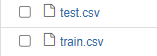

### 2. 데이터 수집
- kaggle 사이트로부터 train, test 다운로드

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

In [171]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [172]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [173]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### 3. 데이터 전처리
- 수집된 데이터 중에서 나의 분석에 필요하지 않은 불필요한 컬럼 삭제
- 결측치 채우기(데이터 삭제, 기술통계, 상관계를 통한 대체값)
- 특성공학
- 새로운 컬럼 만들기
- 범주형 데이터로 바꾸기
- 모든 컬럼 수치화

In [174]:
# 생각하기에 필요없는 데이터 삭제(주관적인거라서 정답이 없음)
train.drop('PassengerId', axis=1, inplace=True)

In [175]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [176]:
# *****중요!!! train, test 모두 같은 전처리를 해주어야 한다.
test.drop('PassengerId', axis=1, inplace=True)

In [177]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [178]:
# 데이터와 컬럼의 갯수 확인 가능
train.shape, test.shape

((891, 11), (418, 10))

In [179]:
# 데이터의 전반적인 정보 확인 -> 결측치 확인도 가능
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [180]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


### Embarked 결측치 채우기

In [181]:
# 문자들로 구성되어있는 Embarked
# .value_counts() : 값들이 각각 몇개가 들어있는지 확인
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [182]:
# 결측치 갯수? 2개
# S가 가장 빈도수가 많아서 null값에 S를 채워준다
train['Embarked'].fillna('S', inplace=True)

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Fare 결측치 채우기

In [184]:
test['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [185]:
# 다른 컬럼과의 상관관계를 이용하여 결측치를 채울 예정
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass가 Fare와 가장 높은 상관관계를 갖는다
- 생존에 관련이 많을 것 같은 성별을 함께 활용해보자

In [186]:
# 몇 개의 컬럼만 뽑아 통계치 확인하고 싶을 때
pt1= train.pivot_table(values='Fare', index=['Pclass', 'Sex'], aggfunc='mean')
pt1

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [187]:
# 누가 Fare의 결측갑을 가질까?
test['Fare'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Fare, Length: 418, dtype: bool

In [188]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [189]:
# 결측치 채우기
test['Fare'].fillna(12.6616, inplace=True)

In [190]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Age 컬럼 결측치 채우기

In [192]:
# 상관관계 
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [193]:
pt2 = train.pivot_table(values='Age', index=['Pclass', 'Sex'], aggfunc='mean')
pt2

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [194]:
pt2.loc[1, 'female']

Age    34.611765
Name: (1, female), dtype: float64

In [195]:
pt2.loc[3, 'male']

Age    26.507589
Name: (3, male), dtype: float64

In [196]:
# 함수 만들기
def fill_age(row):
    # 만약에 나이가 결측치라면 pt2에서 값을 가져오기
    if np.isnan(row['Age']):
        return pt2.loc[row['Pclass'], row['Sex']]
    # 만약 나이가 결측치가 아니라면 원래 값 그대로 사용
    else:
        return row['Age']

In [197]:
train['Age'].tail()

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [198]:
train['Age'] = train.apply(fill_age, axis=1).astype('int64')

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [200]:
test['Age'] = test.apply(fill_age, axis=1).astype('int64')

In [201]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 32.8+ KB


### Cabin 결측치 채우기

In [202]:
# 중복없이 고유한 값들을 볼 수 있는 unique()
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- 결측치를 하나의 데이터로 활용
- Cabin의 종류가 너무 많다 -> 종류를 줄여보자(모델이 복잡해지는 것을 방지(과대적합))

In [203]:
# 데이터는 문자형식으로 되어있다.
train['Cabin'].str

In [204]:
train['Cabin'].str[0]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [205]:
train['Cabin'] = train['Cabin'].str[0]
train['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [206]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [207]:
 # 기존에 겹치지않는 값인 M을 넣는다
train['Cabin'].fillna('M', inplace=True)
train['Cabin']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [208]:
test['Cabin'] = test['Cabin'].str[0]
test['Cabin'].fillna('M', inplace=True)
test['Cabin']

0      M
1      M
2      M
3      M
4      M
      ..
413    M
414    C
415    M
416    M
417    M
Name: Cabin, Length: 418, dtype: object

In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 32.8+ KB


### 4. 탐색적 데이터 분석(EDA)
- train 데이터를 이용해 탐색한다
- 그래프 그려보기

### 범주형 데이터 시각화
- 빈도 기반의 bar chart를 많이 활용

### Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

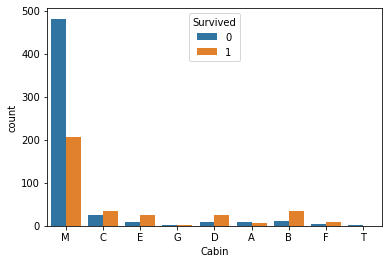

In [211]:
# 학습의 목적인 Survivied 컬럼과의 관계 확인
sns.countplot(data=train, x='Cabin', hue='Survived')

- M에서 상대적으로 많은 사람이 사망했다. 모델에게 학습을 시도해봐도 괜찮겠다(주관적인 생각)

### Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

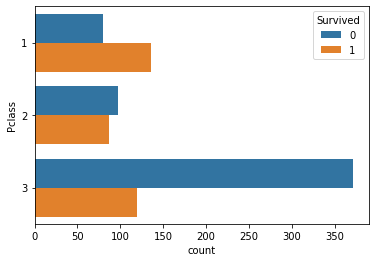

In [212]:
sns.countplot(data=train, y='Pclass', hue='Survived')

- 1등급에 탑승하면 생존 확률이 조금 더 있다
- 3등급에 탑승하면 사망 확률이 꽤 높다
- Pclass 모델 학습에 이용해도 괜찮을 것 같다

### Pclass, Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

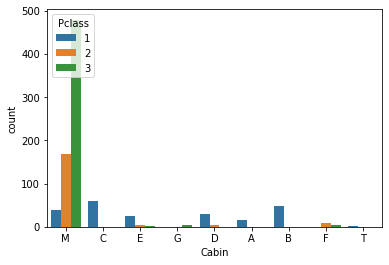

In [213]:
sns.countplot(data=train, x='Cabin', hue='Pclass')

- A, B, C는 1등급 사람들이 탑승했다
- G, F는 1등급 사람들이 없다
- M은 3등급 사람들이 많이 탑승했다 -> 3등급 사람들이 많이 사망해서 정보가 손실되었을까,,,,?

### Embarked, sex 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

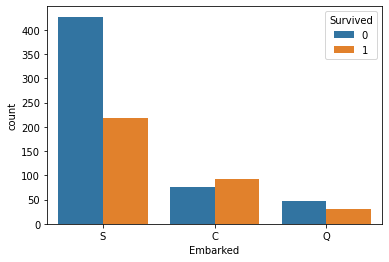

In [214]:
sns.countplot(data=train, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

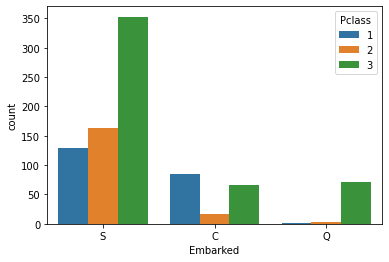

In [215]:
sns.countplot(data=train, x='Embarked', hue='Pclass')
# Embarked 컬럼이 학습에 도움이 될까,,,? 딱히 도움은 안되어 보임

<AxesSubplot:xlabel='Sex', ylabel='count'>

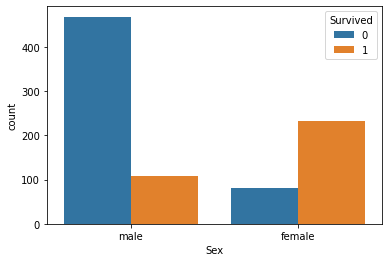

In [216]:
sns.countplot(data=train, x='Sex', hue='Survived')

### 수치형 데이터
- 히스토그램 - 구간에 따라 그래프가 달라질 수 있음
- 커널밀도추정 그래프

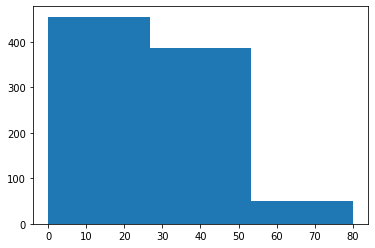

In [217]:
plt.hist(train['Age'], bins=3)
plt.show()

### Age 시각화

- violinplot : KDE(커널밀도추정) + 박스플롯
- 가운데 하얀 점 : 중앙값
- 가운데 검정 사각형 모양 : 하얀점 아래가 25%(1사분위수), 하얀점 윗쪽 75%(3사분위수)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

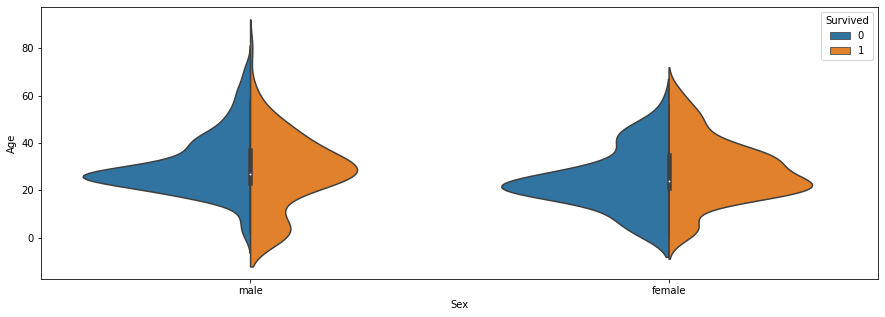

In [218]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train, y='Age', x='Sex', hue='Survived', split=True)

- 남자는 20대가 좀 더 사망했다
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존했다

### Fare 시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

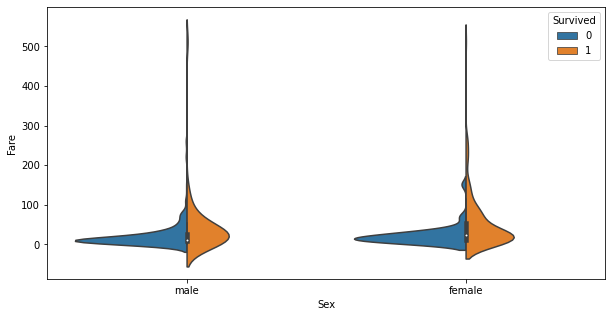

In [219]:
plt.figure(figsize=(10,5))
sns.violinplot(data=train, y='Fare', x='Sex', hue='Survived', split=True)

- 대부분의 사람들은 0~40달러 사이의 요금을 지불했다
- 적은 요금을 지불한 사람들은 사망자가 많다 

### 특성공학
- SibSp와 Parch를 합쳐서 '가족'이라는 새로운 컬럼 생성

In [220]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

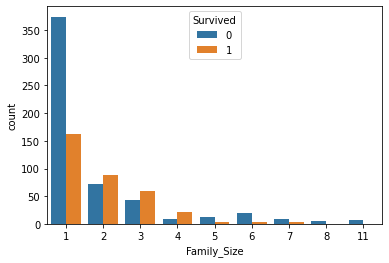

In [221]:
sns.countplot(data=train, x='Family_Size', hue='Survived')

- 1명일 때는 사망 비율이 높다
- 2~4명일 때는 생존 배율이 높다
- 5명 이상일 경우 사망 비율이 높다
- Family_Size라는 수치 데이터를 그대로 사용해도 좋지만, 범주형 데이터로 바꿔보자
- Binning(수치형 -> 범주형) : 모델의 단순화 유도

### 특성공학
- Family_Size가 (1) 1명이라면 Alone, (2) 2~4명이라면 Small, (3) 5명 이상이라면 Large 범주로 변경
- cut함수 활용

In [222]:
bins = [0, 1, 4, 20]
labels = ['Alone', 'Small', 'Large']
train['Family_Group'] = pd.cut(x=train['Family_Size'], bins=bins, labels=labels)

In [223]:
test['Family_Group'] = pd.cut(x=test['Family_Size'], bins=bins, labels=labels)

In [224]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small


<AxesSubplot:xlabel='Family_Group', ylabel='count'>

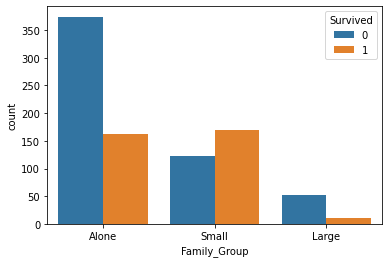

In [225]:
sns.countplot(data=train, x='Family_Group', hue='Survived')

### 특성공학
- text 데이터 다루기(비정형 데이터)
- Name 컬럼 : 중간에 호칭 정보 -> 호칭만 뽑아서 정형화 시키자

In [226]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [227]:
# 반환값이 리스트 : 호칭이 들어있는 문자열을 인덱싱
# 'Mr' 단어 찾기
# 1.
'Braund, Mr. Owen Harris'.split(',')

['Braund', ' Mr. Owen Harris']

In [228]:
# 2.
'Braund, Mr. Owen Harris'.split(',')[1]

' Mr. Owen Harris'

In [229]:
# 3.
' Mr. Owen Harris'.split('.')

[' Mr', ' Owen Harris']

In [230]:
# 4.
' Mr. Owen Harris'.split('.')[0]

' Mr'

In [231]:
# 5. 즉
'Braund, Mr. Owen Harris'.split(',')[1].split('.')[0] # 하지만 'Mr' 앞에 공백이 있어서 제거하자

' Mr'

In [232]:
# 6. 공백제거하기
'Braund, Mr. Owen Harris'.split(',')[1].split('.')[0].strip()

'Mr'

In [233]:
# 모든 이름에서 문자 가져오기
def split_title(row):
    return row.split(',')[1].split('.')[0].strip()

In [234]:
# 새 컬럼 생성
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

In [235]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small,Mr


In [236]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1,Alone,Mr


In [237]:
# 정형화된 Title 종류 확인하기
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

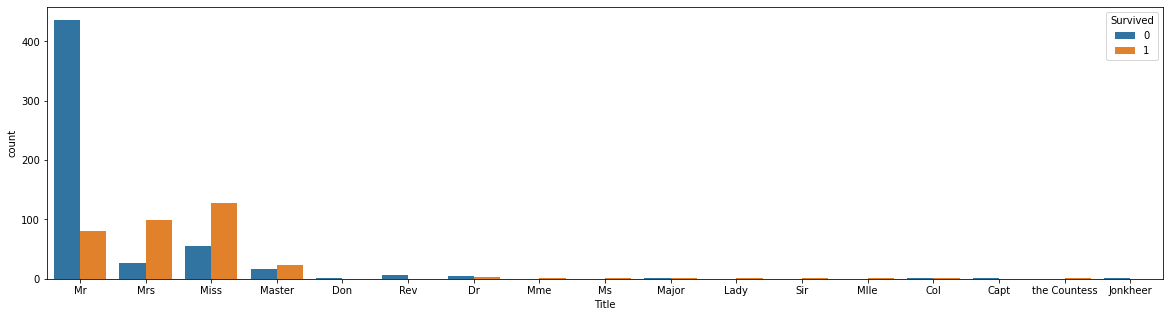

In [238]:
plt.figure(figsize=(20,5))
sns.countplot(data=train, x='Title', hue='Survived')

(0.0, 20.0)

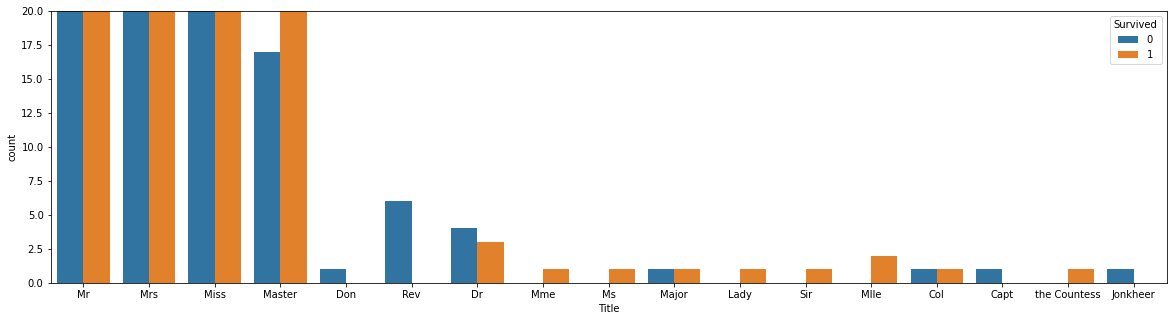

In [239]:
plt.figure(figsize=(20,5))
sns.countplot(data=train, x='Title', hue='Survived')
plt.ylim(0, 20)

- Mr, Mrs, Miss : 성별과 관련된 호칭 : 학습에 적용시켜 볼 수 있을 것 같다
- 나머지 호칭들은 인원수가 적고, 종류가 많기 때문에 범주를 통합시켜보자

In [240]:
# map 함수 사용하기
title_dic = {
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Don' : 'Other',
    'Rev' : 'Other',
    'Dr' : 'Other',
    'Mme' : 'Miss',
    'Ms' : 'Miss',
    'Major': 'Other',
    'Lady' : 'Miss',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other',
    'Capt': 'Other',
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [241]:
train['Title2'] = train['Title'].map(title_dic)

In [242]:
# NaN 데이터 등장 : train에 없는 호칭이지만, test에만 등장하는 호칭이 있아
# titlet._dic : 추가해 주자('Donna')
test['Title2'] = test['Title'].map(title_dic)

In [243]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [244]:
test.info

<bound method DataFrame.info of      Pclass                                          Name     Sex  Age  SibSp  \
0         3                              Kelly, Mr. James    male   34      0   
1         3              Wilkes, Mrs. James (Ellen Needs)  female   47      1   
2         2                     Myles, Mr. Thomas Francis    male   62      0   
3         3                              Wirz, Mr. Albert    male   27      0   
4         3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   22      1   
..      ...                                           ...     ...  ...    ...   
413       3                            Spector, Mr. Woolf    male   26      0   
414       1                  Oliva y Ocana, Dona. Fermina  female   39      0   
415       3                  Saether, Mr. Simon Sivertsen    male   38      0   
416       3                           Ware, Mr. Frederick    male   26      0   
417       3                      Peter, Master. Michael J    male   26      1

In [245]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title,Title2
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,2,Small,Mr,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2,Small,Mrs,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone,Miss,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,2,Small,Mrs,Mrs
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,1,Alone,Mr,Mr


### 티켓 정보는 사용하지 않겠다

### 사용하지 않을 컬럼 정리

In [246]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title',
       'Title2'],
      dtype='object')

In [247]:
# 3가지 컬럼 삭제
train.drop(['Name', 'Ticket', 'Title'], axis=1, inplace=True)

In [248]:
test.drop(['Name', 'Ticket', 'Title'], axis=1, inplace=True)

In [249]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_Size', 'Family_Group', 'Title2'],
      dtype='object')

In [250]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Family_Size', 'Family_Group', 'Title2'],
      dtype='object')

### 5. 모델링
- 인코딩(문자형태의 데이터를 숫자 형태의 데이터로 변환)
    1. label encoding
    2. one-hot-encoding
- 모델 선택 및 하이퍼파라미터 조정

### 6. 모델 학습
### 7. 모델 평가

In [251]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Family_Size', 'Family_Group', 'Title2'],
      dtype='object')

In [252]:
pd.get_dummies(train['Title2'], prefix='컬럼이름')

,컬럼이름_Master,컬럼이름_Miss,컬럼이름_Mr,컬럼이름_Mrs,컬럼이름_Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [253]:
categorical_features = ['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title2']

In [254]:
for feature_name in categorical_features:
    one_hot = pd.get_dummies(train[feature_name], prefix=feature_name) # 원-핫
    train.drop(feature_name, axis=1, inplace=True) # 글자 컬럼 삭제
    train = pd.concat([train, one_hot], axis=1) # 원본 데이터 + 원핫 데이텀

In [255]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,3,22,1,0,7.25,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [256]:
for feature_name in categorical_features:
    one_hot = pd.get_dummies(test[feature_name], prefix=feature_name) # 원-핫
    test.drop(feature_name, axis=1, inplace=True) # 글자 컬럼 삭제
    test = pd.concat([test, one_hot], axis=1) # 원본 데이터 + 원핫 데이텀

In [257]:
test.head(1)

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,3,34,0,0,7.8292,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [258]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [259]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [260]:
# 차집합 연산
set(train.columns) - set(test.columns)
# train의 Cabin에는 T라는 데이터가 있어서, 원핫인코딩때 컬럼 생성
# test에는 없어서 안 만들어짐
# -> 0으로 채워주자(왜냐면 없는 데이터니까)

{'Cabin_T', 'Survived'}

In [261]:
test['Cabin_T']=0

In [262]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [263]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other', 'Cabin_T'],
      dtype='object')

In [264]:
train[train.columns]

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,3,22,1,0,7.2500,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,38,1,0,71.2833,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,26,0,0,7.9250,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,35,1,0,53.1000,2,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,3,35,0,0,8.0500,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,0,1,0,...,0,1,1,0,0,0,0,0,0,1
887,1,1,19,0,0,30.0000,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
888,0,3,21,1,2,23.4500,4,1,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,26,0,0,30.0000,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


### 문제와 정답으로 나누기

In [265]:
X_train = train.drop('Survived', axis=1) # 문제 데이터
y_train = train['Survived'] # 정답 데이터

In [266]:
X_train.head(1)

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,3,22,1,0,7.25,2,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [267]:
X_test = test[X_train.columns]
# y_test는 kaggle 사이트에 있다

### 앙상블 모델

In [268]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
rf_model = RandomForestClassifier(random_state=777,
                      n_estimators=1000, # 생성될 나무 개수
                      max_depth=7,       # 나무의 길이
                      max_features=0.5)  # 사용할 컬럼 갯수 비율


In [270]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=0.5, n_estimators=1000,
                       random_state=777)

In [271]:
from sklearn.model_selection import cross_val_score

In [272]:
rf_result = cross_val_score(rf_model,X_train,y_train, cv=5)
rf_result

array([0.84916201, 0.80337079, 0.84269663, 0.79775281, 0.84269663])

In [273]:
rf_result.mean()

0.8271357730211537

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
# 내가 궁금한 파라미터  - 딕셔너리 
params = {
    'n_estimators' : [1000, 1500, 2000],
    'max_depth' : [3,5,7,9],
    'max_features' : [0.3,0.5,0.7],
    'min_samples_leaf' : [10,20]
    
}

In [276]:
grid=GridSearchCV(rf_model,params, cv=3)

In [277]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=7, max_features=0.5,
                                              n_estimators=1000,
                                              random_state=777),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': [0.3, 0.5, 0.7],
                         'min_samples_leaf': [10, 20],
                         'n_estimators': [1000, 1500, 2000]})

In [302]:
# 가장 좋은 조합!
grid.best_params_

# 가장 좋은 조합의 score
grid.best_score_

# 가장 좋은 모델
grid.best_estimator_

RandomForestClassifier(max_depth=5, max_features=0.3, min_samples_leaf=10,
                       n_estimators=1000, random_state=777)

### 부스팅 모델

In [278]:
from sklearn.ensemble import GradientBoostingClassifier

In [279]:
gb_model = GradientBoostingClassifier(n_estimators=1000,
                           max_depth=5,
                           learning_rate=0.01) # 오차를 반영하는 정도


In [280]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=1000)

### xgboost

In [281]:
get_ipython().system('pip install xgboost')

In [282]:
from xgboost import XGBClassifier

In [300]:
# - booster -> gbtree, gblinear
# - objective 
# > 이진분류 : 'binary:logistic', <br>
# > 다중분류 : 'multi:softmax' <br>
# > 회귀 : 'reg:squarederror'

In [301]:
xgb = XGBClassifier(booster='gbtree',
             objective= 'binary:logistic',
             n_estimator=1000,
             max_depth=3,
             learning_rate=0.01)

### 모델 선택

In [303]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [304]:
# 모델 생성
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

### train, validation 분리

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [307]:
X_train.shape, y_train.shape

((501, 28), (501,))

### 교차 검증( == 성능 평가)

In [308]:
from sklearn.model_selection import cross_val_score

In [309]:
# cross_val_score(모델, 문제데이터, 정답데이터, 겹)
knn_result = cross_val_score(knn_model, X_train, y_train, cv=5)
knn_result  # 총 5번을 테스트 했기에 array에 5개 값이 들어있다.

array([0.71287129, 0.68      , 0.67      , 0.73      , 0.63      ])

In [310]:
knn_result.mean()

0.6845742574257425

### 하이퍼파라미터튜닝

In [311]:
score_list = []

for k in range(1, 150) : # 이웃이 작으면 복잡(과대적합), 크면 단순(과소적합)
    knn_model = KNeighborsClassifier(n_neighbors=k) # 이웃의 수에 따른 모델 생성
    knn_result = cross_val_score(knn_model, X_train, y_train, cv=5) # 교차검증값
    score_list.append(knn_result.mean())

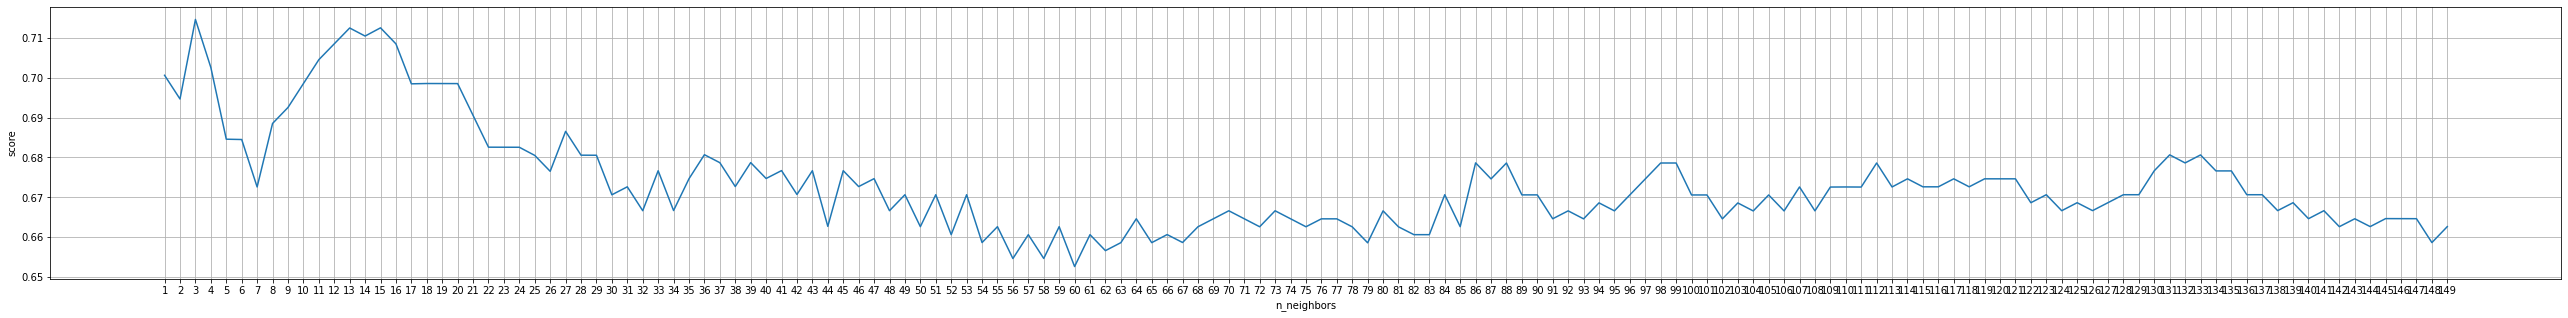

In [312]:
plt.figure(figsize=(45, 5))
plt.plot(range(1, 150), score_list)
plt.xticks(range(1, 150))
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

- 교차검증을 통한 knn의 최적의 이웃이 7

In [313]:
tree_result = cross_val_score(tree_model, X_train, y_train, cv=5)
tree_result

array([0.81188119, 0.75      , 0.8       , 0.77      , 0.77      ])

In [314]:
# tree 모델로 하이퍼파라미터 튜닝
for tree in range(1, 150) : # 깊이가 깊으면 복잡, 얕으면 단순
    tree_model = DecisionTreeClassifier(max_depth=tree) # 깊이에 따른 모델 생성
    tree_result = cross_val_score(tree_model, X_train, y_train, cv=5) # 교차검증값
    score_list.append(tree_result.mean())

ValueError: x and y must have same first dimension, but have shapes (149,) and (298,)

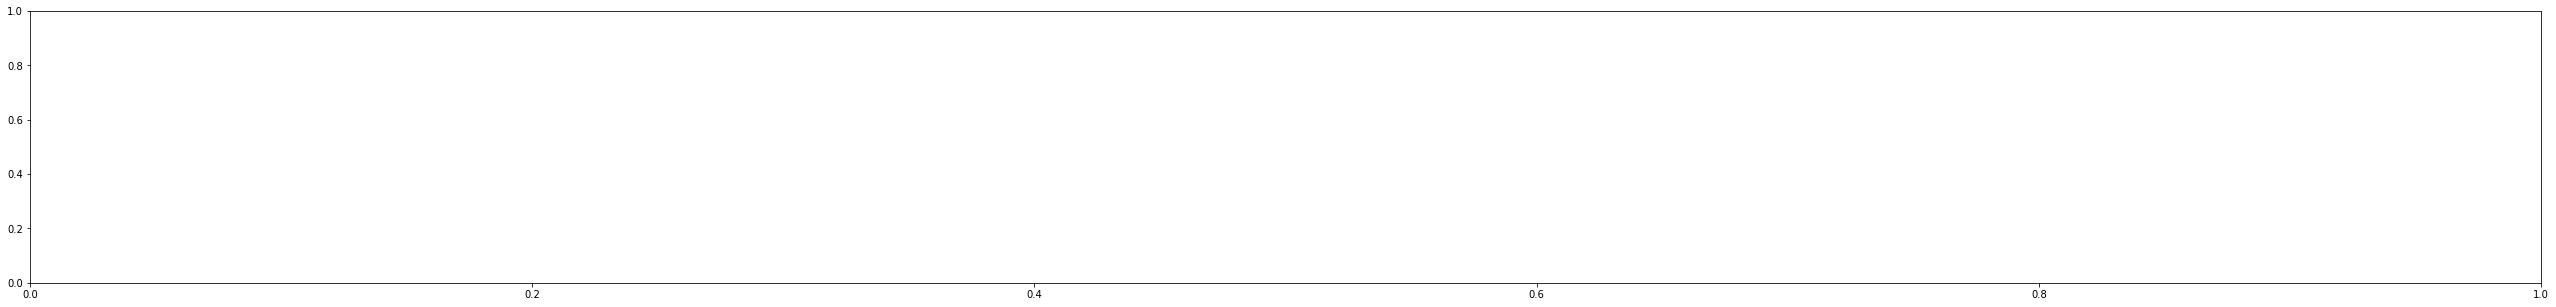

In [315]:
# 시각화
plt.figure(figsize=(45, 5))
plt.plot(range(1, 150), score_list)
plt.xticks(range(1, 150))
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

- tree의 깊이는 5정도가 괜찮다

### 모델 학습 및 평가

In [316]:
cross_val_score(final_knn, X_train, y_train, cv=5).mean()

0.6726138613861387

In [317]:
cross_val_score(final_tree, X_train, y_train, cv=5).mean()

0.8202970297029702

In [318]:
# 학습
final_knn = KNeighborsClassifier(n_neighbors=7)
final_knn.fit(X_train, y_train)

final_tree = DecisionTreeClassifier(max_depth=5)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [319]:
# 예측
final_knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [320]:
final_tree.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### knn Scaler 적용

In [321]:
# tree 모델과 knn 모델의 성능이 10 차이(knn이 더 안 좋음)
# knn 성능을 높일 수 있는 방법이 없을까?
# -> knn은 거리 기반 모델
# -> 그럼 데이터를 스케일링 시켜보자 (범위를 맞춰보자)

In [322]:
from sklearn.preprocessing import StandardScaler

In [323]:
scaler = StandardScaler()

In [324]:
scaler.fit(X_train)

StandardScaler()

In [325]:
trainsform_X_train = scaler.transform(X_train)
trainsform_X_train # train의 범위를 맞추는 것

array([[ 0.82842508, -0.25914043, -0.48990791, ...,  0.86350715,
        -0.40967325, -0.16321564],
       [ 0.82842508, -0.25914043, -0.48990791, ...,  0.86350715,
        -0.40967325, -0.16321564],
       [ 0.82842508, -0.6396485 ,  0.51190377, ..., -1.158068  ,
        -0.40967325, -0.16321564],
       ...,
       [-1.59163887, -0.56354689, -0.48990791, ..., -1.158068  ,
        -0.40967325, -0.16321564],
       [ 0.82842508,  0.73018057, -0.48990791, ...,  0.86350715,
        -0.40967325, -0.16321564],
       [ 0.82842508, -0.25914043,  0.51190377, ...,  0.86350715,
        -0.40967325, -0.16321564]])

In [326]:
X_train.shape, y_train.shape

((501, 28), (501,))

In [327]:
X_test.shape

(418, 28)

In [328]:
trainsform_X_test = scaler.transform(X_test)
trainsform_X_test

array([[ 0.82842508,  0.34967249, -0.48990791, ...,  0.86350715,
        -0.40967325, -0.16321564],
       [ 0.82842508,  1.33899349,  0.51190377, ..., -1.158068  ,
         2.44096975, -0.16321564],
       [-0.38160689,  2.48051771, -0.48990791, ...,  0.86350715,
        -0.40967325, -0.16321564],
       ...,
       [ 0.82842508,  0.65407895, -0.48990791, ...,  0.86350715,
        -0.40967325, -0.16321564],
       [ 0.82842508, -0.25914043, -0.48990791, ...,  0.86350715,
        -0.40967325, -0.16321564],
       [ 0.82842508, -0.25914043,  0.51190377, ..., -1.158068  ,
        -0.40967325, -0.16321564]])

### scaling 된 데이터로 성능 확인

In [329]:
scaling_result = cross_val_score(knn_model, trainsform_X_train, y_train, cv=5)

In [330]:
scaling_result.mean()

0.6606732673267326

- 스케일링 된 데이터를 이용한 파라미터 튜닝

In [331]:
score_list = []

for k in range(1, 150) : 
    k_model = KNeighborsClassifier(n_neighbors=k) 
    k_result = cross_val_score(k_model, trainsform_X_train, y_train, cv=5) # 교차검증값
    score_list.append(k_result.mean())

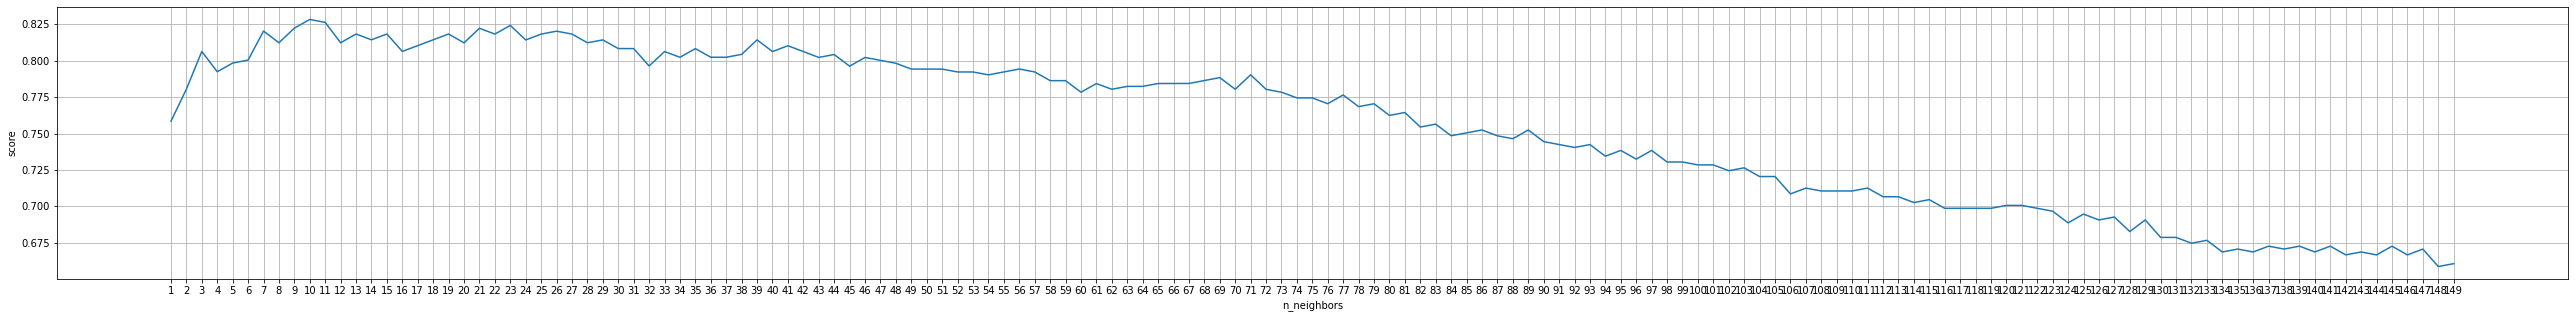

In [332]:
# 시각화
plt.figure(figsize=(45, 5))
plt.plot(range(1, 150), score_list)
plt.xticks(range(1, 150))
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

### 예측 결과 저장하기

In [335]:
tree_pre = final_tree.predict(X_test)
tree_pre

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [336]:
submission = pd.read_csv('gender_submission.csv')
submission.head(1)

,PassengerId,Survived
0,892,0


In [337]:
submission['Survived'] = tree_pre

In [338]:
submission.to_csv('tree_submission01.csv', index=False) # index=False 인덱스는 따롲 저장이 안되고

### age를 범주형 데이터로 변경
- ex) 22살 > 2, 35살 > 3

In [339]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 2
    elif x < 30:
        return 3
    elif x < 40:
        return 4
    elif x < 50:
        return 5
    elif x < 60:
        return 6
    else:
        return 7

In [340]:
train['Age_cat'] = train['Age'].apply(category_age)

In [341]:
test['Age_cat'] = test['Age'].apply(category_age)

In [342]:
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)

In [343]:
train.head(1)

,Survived,Pclass,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other,Age_cat
0,0,3,1,0,7.25,2,0,1,0,0,...,1,0,1,0,0,0,1,0,0,3


### Fare(요금)을 정규분포로 변환
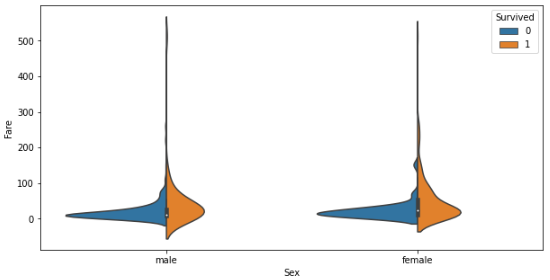

C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


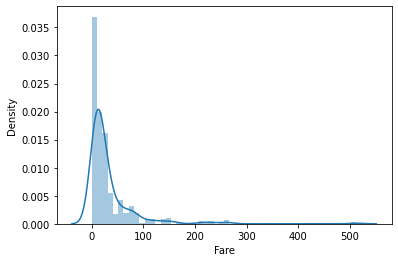

In [344]:
sns.distplot(train['Fare'])
plt.show()

In [345]:
# 데이터의 분포가 굉장히 비대칭적이다
# 이대로 학습을 진행한다면, 모델이 잘못 학습될 수 있다
# 몇 개 안되는 이상치에 민감하게 반응하면, 실제 예측에 좋지 않은 결과가 나올 수 있다
# 이러한 영향을 줄이기 위해 log 사용

In [346]:
train['Fare'] = np.log(train['Fare'] + 1)

In [347]:
test['Fare'] = np.log(test['Fare'] + 1)

C:\Users\smhrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


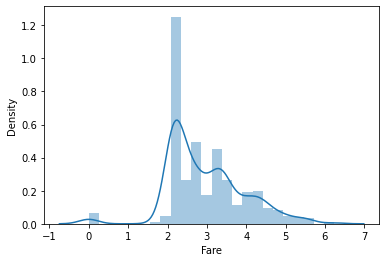

In [348]:
sns.distplot(train['Fare'])
plt.show()